C:\Users\Nashat\AppData\Local\Temp\ipykernel_23028\1559792149.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Wor'"][i] = (data["Wor"][i] - data["Wor"][i-1])/(data["Month"][i] - data["Month"][i-1])


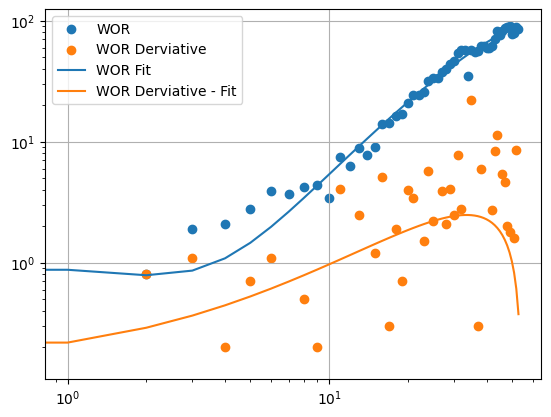

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_fit(x, y, degree=1):
    polyfit = np.polyfit(x,y, deg=degree)
    polyfunc = np.poly1d(polyfit)
    y_fitted = polyfunc(x)
    return y_fitted, x # muliptle return from python
data = pd.read_csv("1-wor.txt", sep="\t")
data["Wor'"] = 0

for i in range(1, len(data)):
    data["Wor'"][i] = (data["Wor"][i] - data["Wor"][i-1])/(data["Month"][i] - data["Month"][i-1])

#create a fitting for historiacl data and the derviative
wor_hist, x_axis = create_fit(data["Month"], data["Wor"], 3)
wor_derv, x_axis_derv = create_fit(data["Month"], data["Wor'"], 3)

#plot historical data
plt.scatter(data["Month"], data["Wor"], label="WOR")
#add the derivative as well
plt.scatter(data["Month"], data["Wor'"], label="WOR Derviative")

#plotting the fitting
plt.plot(x_axis, wor_hist, label="WOR Fit")
plt.plot(x_axis_derv, wor_derv, label="WOR Derviative - Fit")
plt.xscale("log");plt.yscale("log")

plt.grid()
plt.legend()
